In [1]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
titanic = pd.read_csv('train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.050,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.750,NaN,Q
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.500,NaN,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.600,A16,C


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# найдем пропуски в датафрейме и просуммируем их по столбцам
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
# пропущенные значения в процентах
(titanic.isna().sum() / len(titanic)).round(4) * 100


,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [11]:
!pip install missingno


<Axes: >

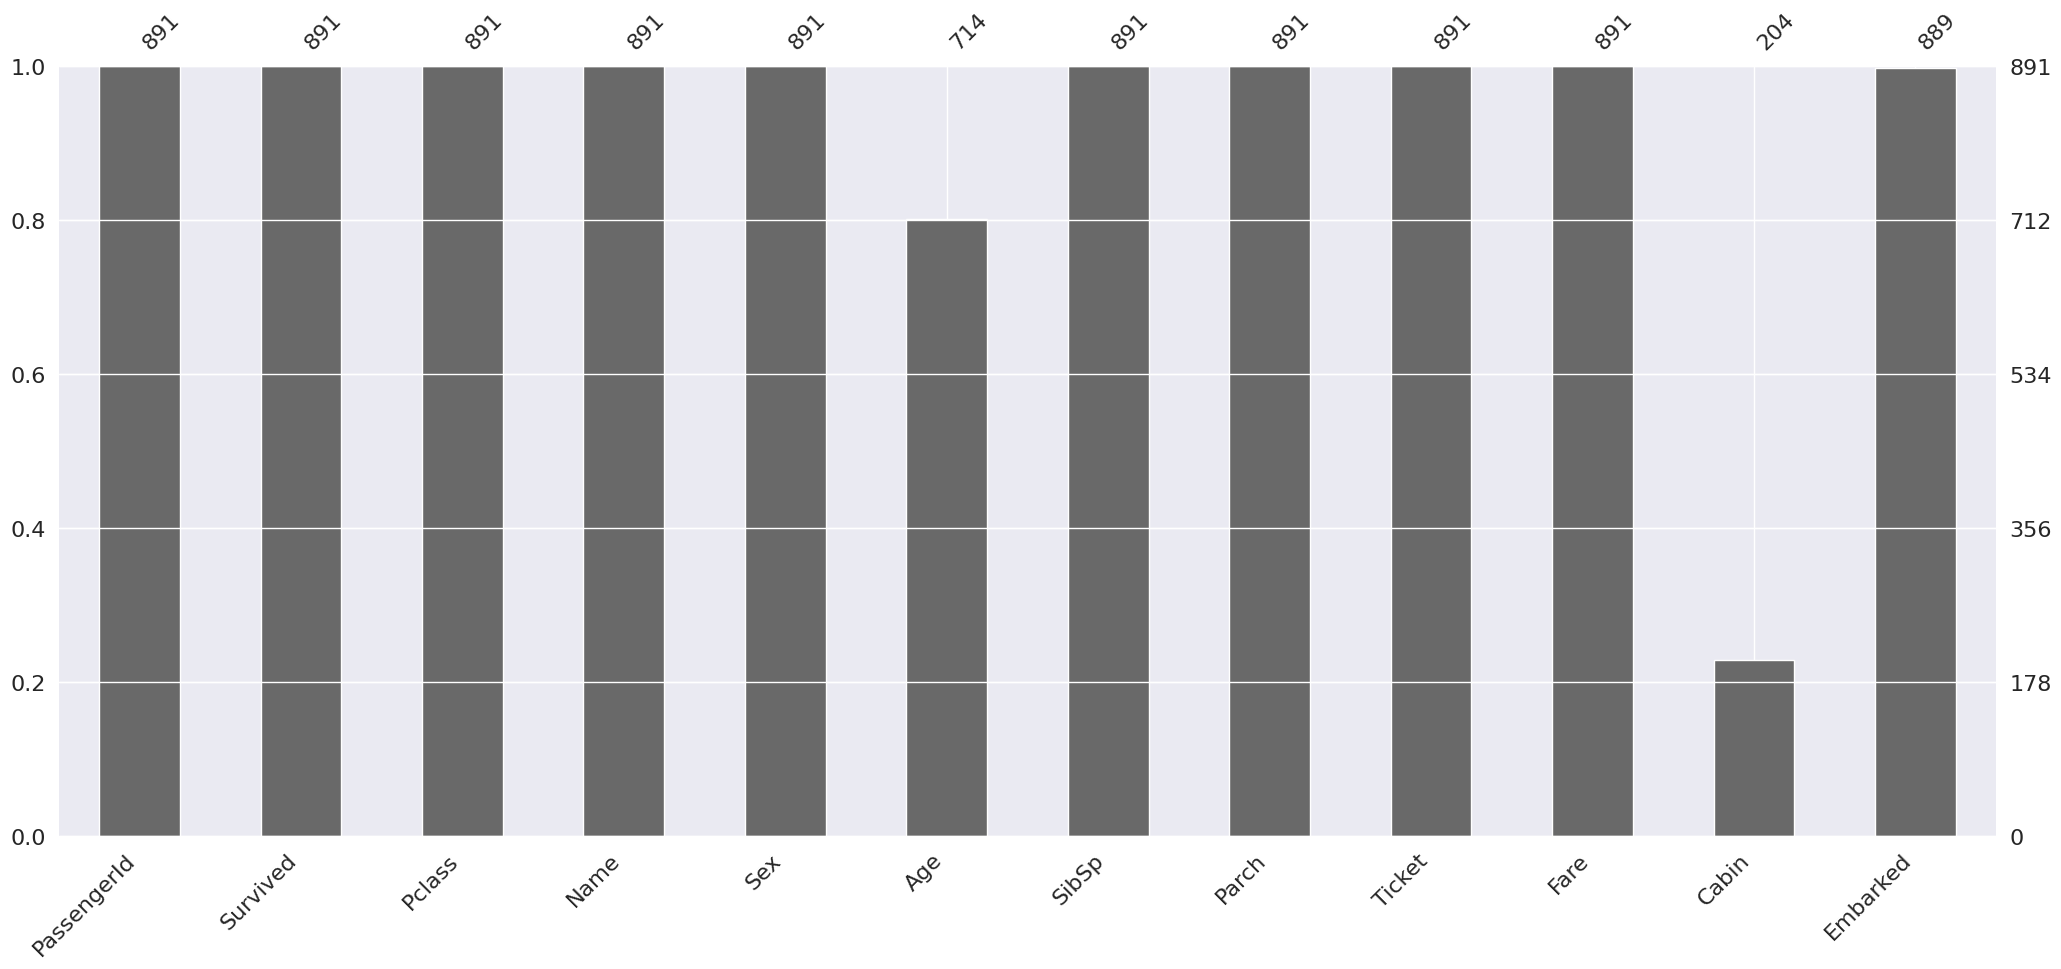

In [12]:
# импортируем библиотеку missingno с псевдонимом msno
import missingno as msno

# сделаем стиль графиков seaborn основным
sns.set()

msno.bar(titanic)


<Axes: >

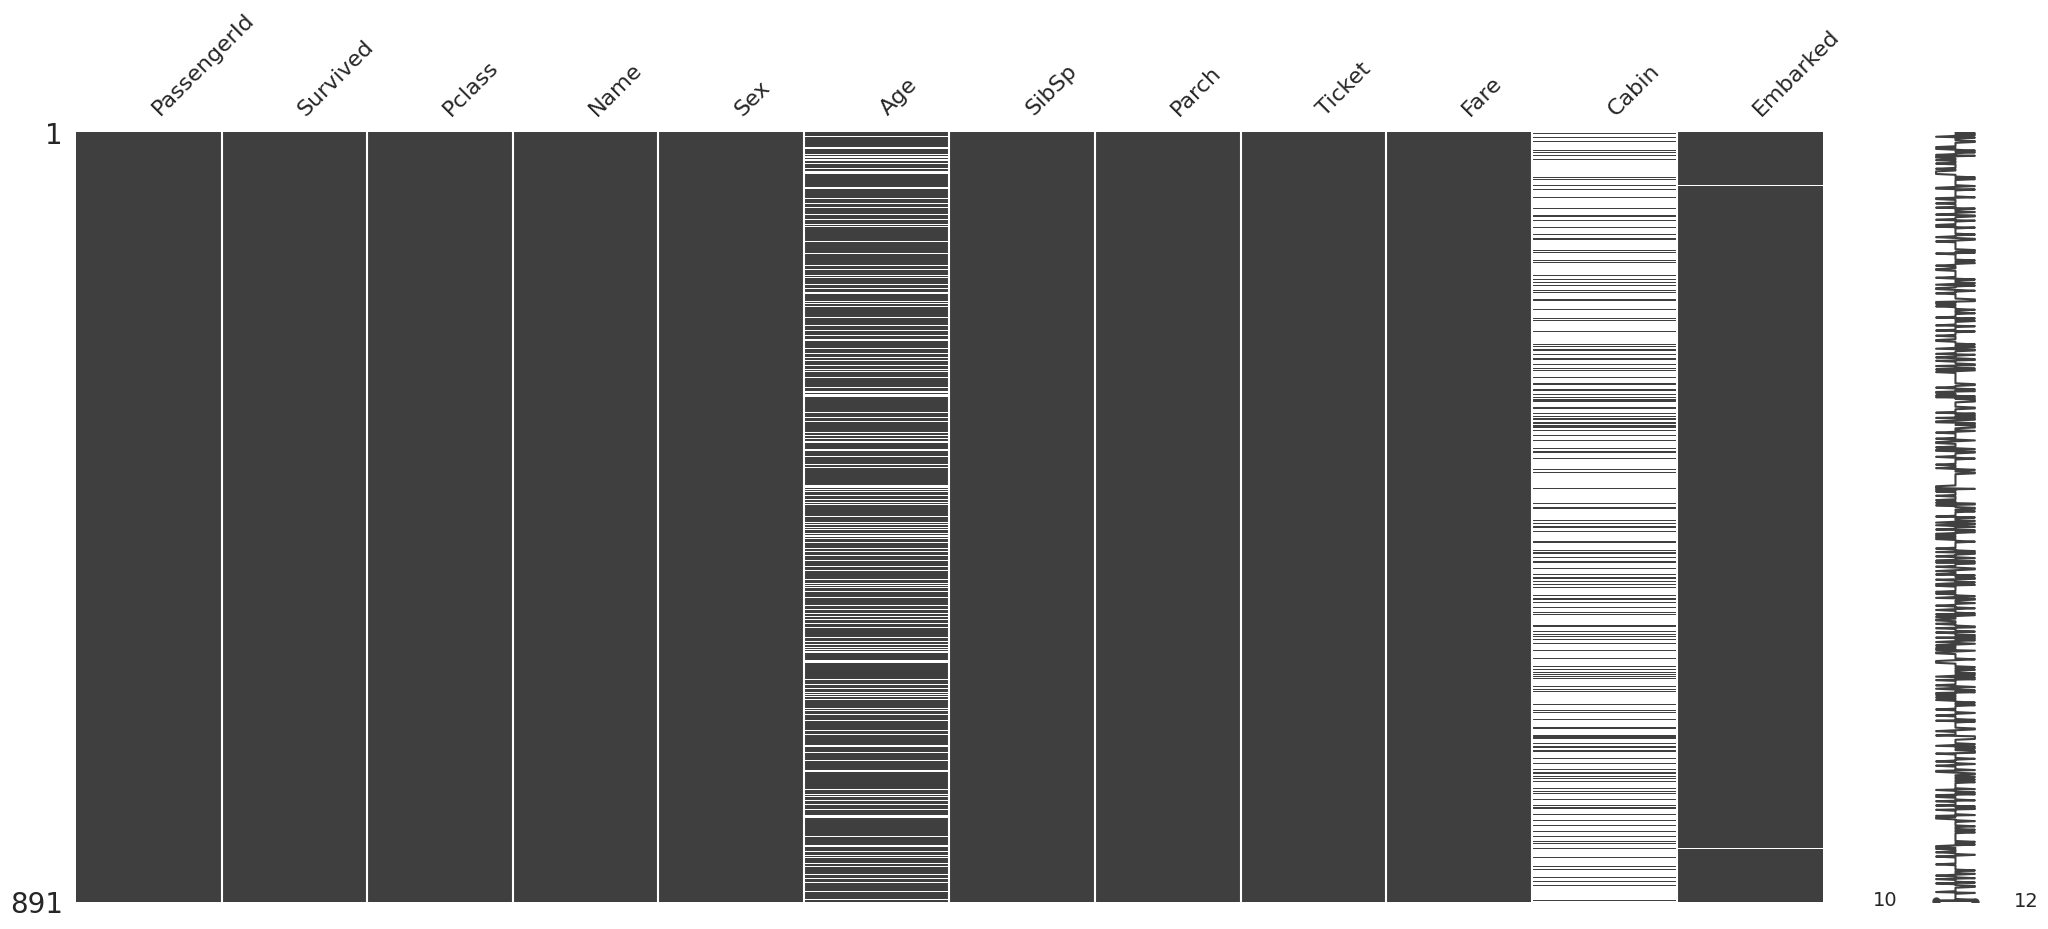

In [13]:
msno.matrix(titanic)

In [14]:
titanic.dropna(axis='index', subset=['Embarked'], inplace=True)


In [15]:
titanic.Embarked.isna().sum()


0

In [16]:
# передадим в параметр columns тот столбец, который хотим удалить
titanic.drop(columns=['Cabin'], inplace=True)


In [17]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
# возьмем лишь некоторые из столбцов
titanic1 = titanic[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']]


In [19]:
# вначале сделаем копию датасета
fillna_const = titanic.copy()

# заполним пропуски в столбце Age нулями, передав методу .fillna() словарь,
# где ключами будут названия столбцов, а значениями - константы для заполнения пропусков
fillna_const.fillna({'Age': 0}, inplace=True)

# посмотрим, как такое заполнение отразилось на данных
titanic.Age.median(), fillna_const.Age.median()


(28.0, 24.0)

In [20]:
# найдем пассажиров с неизвестным портом посадки
# для этого создадим маску по столбцу Embarked и применим ее к исходным данным
missing_embarked = pd.read_csv('train.csv')
missing_embarked[missing_embarked.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
# метод .fillna() можно применить к одному столбцу
# два пропущенных значения в столбце Embarked заполним буквой S (Southampton)
fillna_const.Embarked.fillna('S', inplace=True)


<ipython-input-22-41d8e86f3ca6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fillna_const.Embarked.fillna('S', inplace=True)


In [23]:
# убедимся, что в столбцах Age и Embarked не осталось пропущенных значений
fillna_const[['Age', 'Embarked']].isna().sum()


,0
Age,0
Embarked,0


In [24]:
# применим метод библиотеки Numpy
np.unique(titanic.Survived, return_counts=True)


(array([0, 1]), array([549, 340]))

In [26]:
# теперь воспользуемся методами библиотеки Pandas
# первый метод возвращает только уникальные значения
titanic.Survived.unique()


array([0, 1])

In [25]:
# второй - уникальные значения и их частоту
titanic.Survived.value_counts()


,count
Survived,
0,549
1,340


In [27]:
# для получения относительной частоты, делить на общее количество строк не нужно,
# достаточно указать параметр normalize = True
titanic.Survived.value_counts(normalize=True)


,proportion
Survived,
0,0.617548
1,0.382452


In [29]:
titanic[['Sex', 'Embarked']].describe()


,Sex,Embarked
count,889,889
unique,2,3
top,male,S
freq,577,644


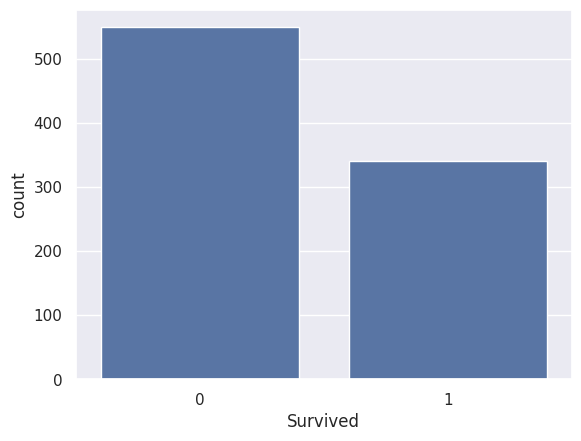

In [30]:
# функция countplot() сама посчитает количество наблюдений в каждой из категорий
sns.countplot(x='Survived', data=titanic);


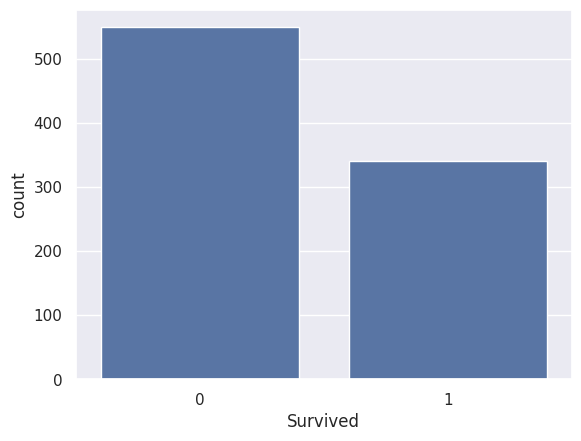

In [32]:
# для функции barplot() количество наблюдений можно посчитать
# с помощью метода .value_counts()
sns.barplot(x=titanic.Survived, y=titanic.Survived.value_counts());



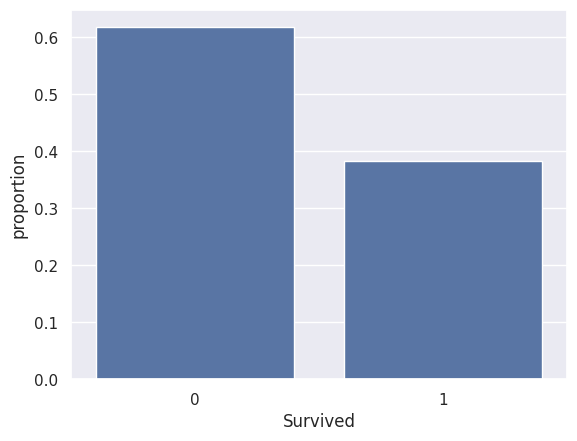

In [33]:
# относительное количество наблюдений удобно посчитать с параметром normalize = True
sns.barplot(x=titanic.Survived, y=titanic.Survived.value_counts(normalize=True));


In [34]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
titanic['Age'].describe()


,Age
count,712.000000
mean,29.642093
std,14.492933
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


(array([ 54.,  46., 177., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

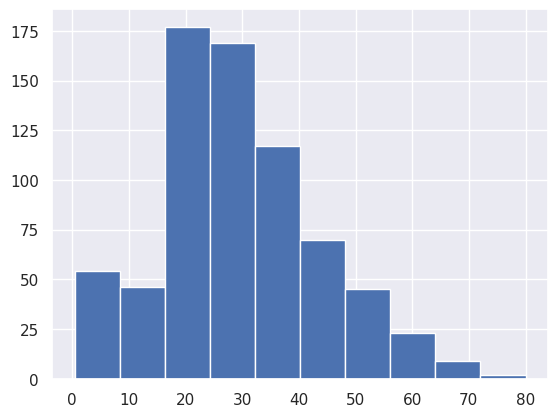

In [36]:
# гистограмма распределения возраста с помощью библиотеки Matplotlib
plt.hist(titanic.Age, bins=10)


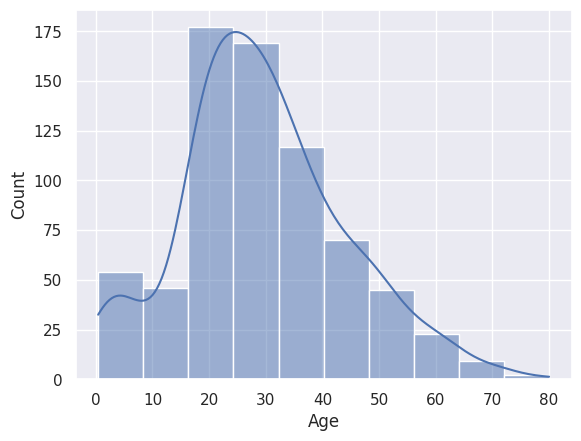

In [37]:
# в библиотеке Seaborn мы указываем источник данных, что будет на оси x и количество интервалов
# параметр kde = True добавляет кривую плотности распределения
sns.histplot(data=titanic, x='Age', bins=10, kde=True);


<Axes: xlabel='Pclass', ylabel='count'>

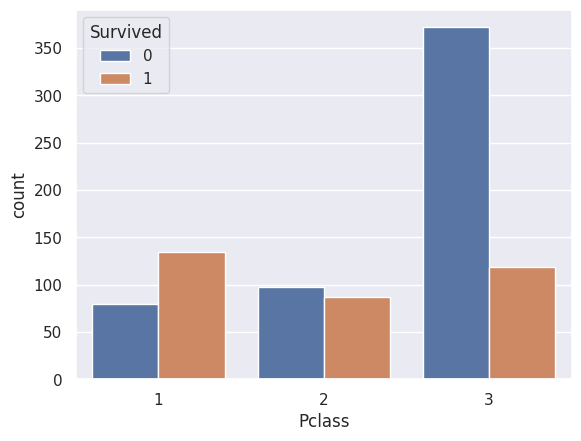

In [38]:
# countplot и barplot
# создадим grouped countplot, где по оси x будет класс, а по оси y - количество пассажиров
# в каждом классе данные разделены на погибших (0) и выживших (1)
sns.countplot(x='Pclass', hue='Survived', data=titanic)


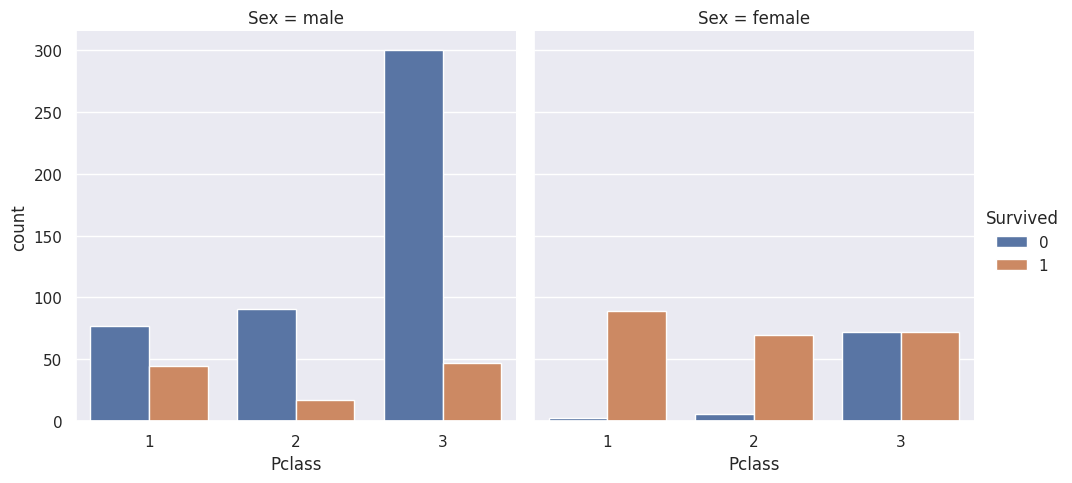

In [39]:
# добавим еще один признак (пол) через параметр col
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=titanic);


(array([36., 19., 63., 65., 51., 24., 21.,  8.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

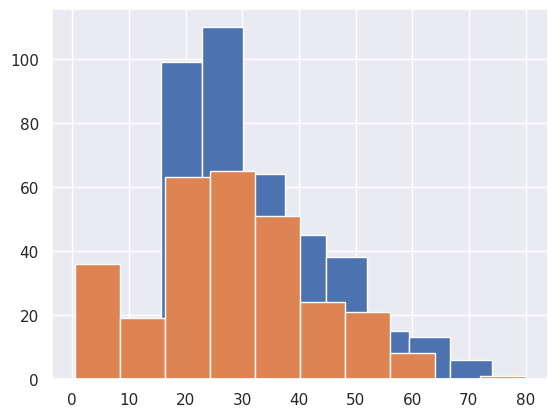

In [40]:
# выведем две гистограммы на одном графике в библиотеке Matplotlib
# отфильтруем данные по погибшим и выжившим и построим гистограммы по столбцу Age
plt.hist(x=titanic[titanic['Survived'] == 0]['Age'])
plt.hist(x=titanic[titanic['Survived'] == 1]['Age'])


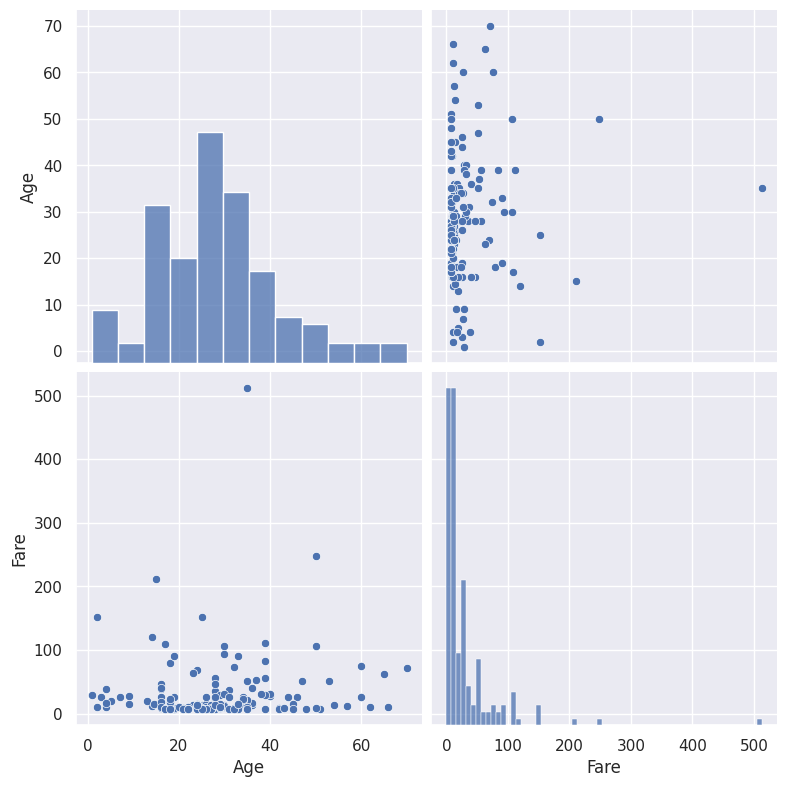

In [41]:
# параметр height функции pairplot() задает высоту каждого графика в дюймах
sns.pairplot(titanic[['Age', 'Fare']].sample(frac=0.2, random_state=42), height=4);


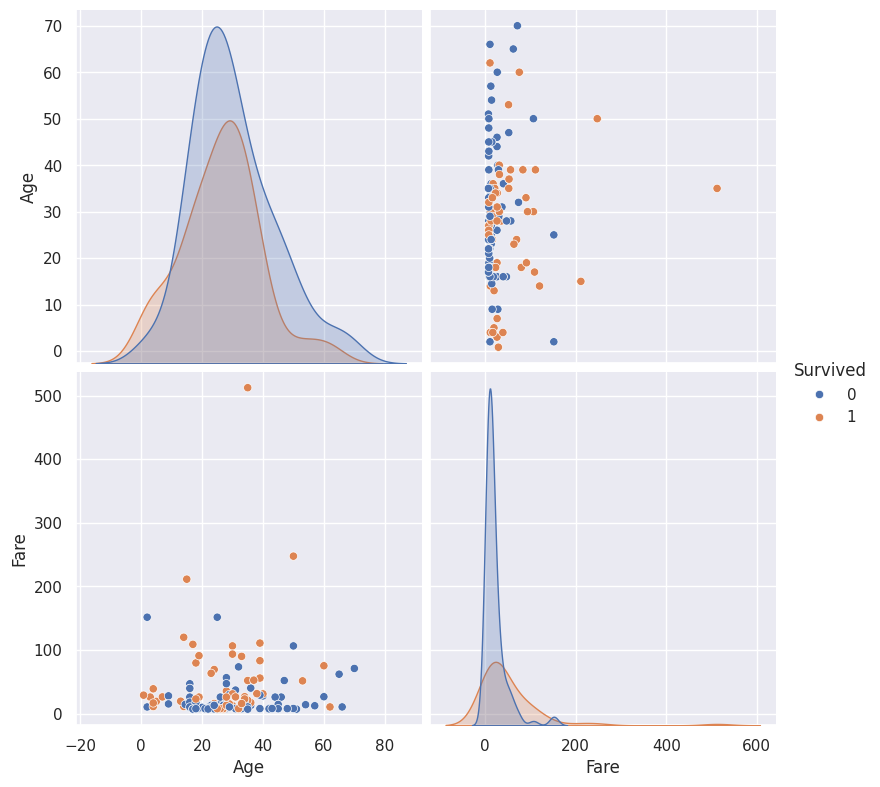

In [42]:
# обратите внимание, столбец Survived мы добавили и в параметр hue и в датафрейм с данными
sns.pairplot(titanic[['Age', 'Fare', 'Survived']].sample(frac=0.2, random_state=42),
             hue='Survived',
             height=4);


In [43]:
!pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 32.0 MB/s eta 0:00:00


In [45]:
import sweetviz as sv

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [46]:
comparison = sv.compare(train, test)


                                             |          | [  0%]   00:00 -> (? left)


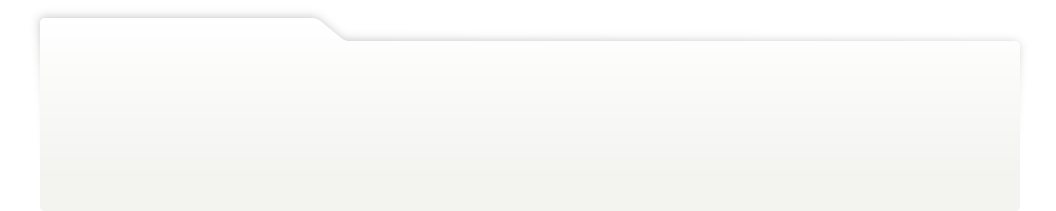
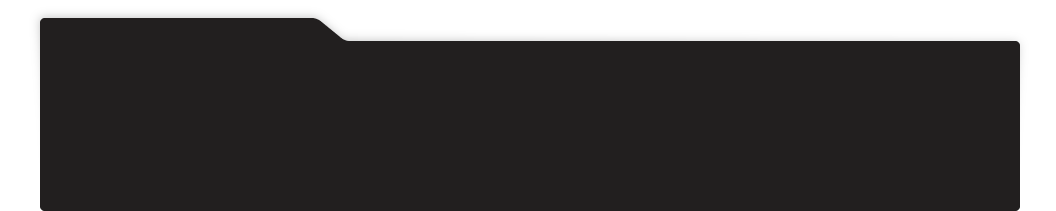
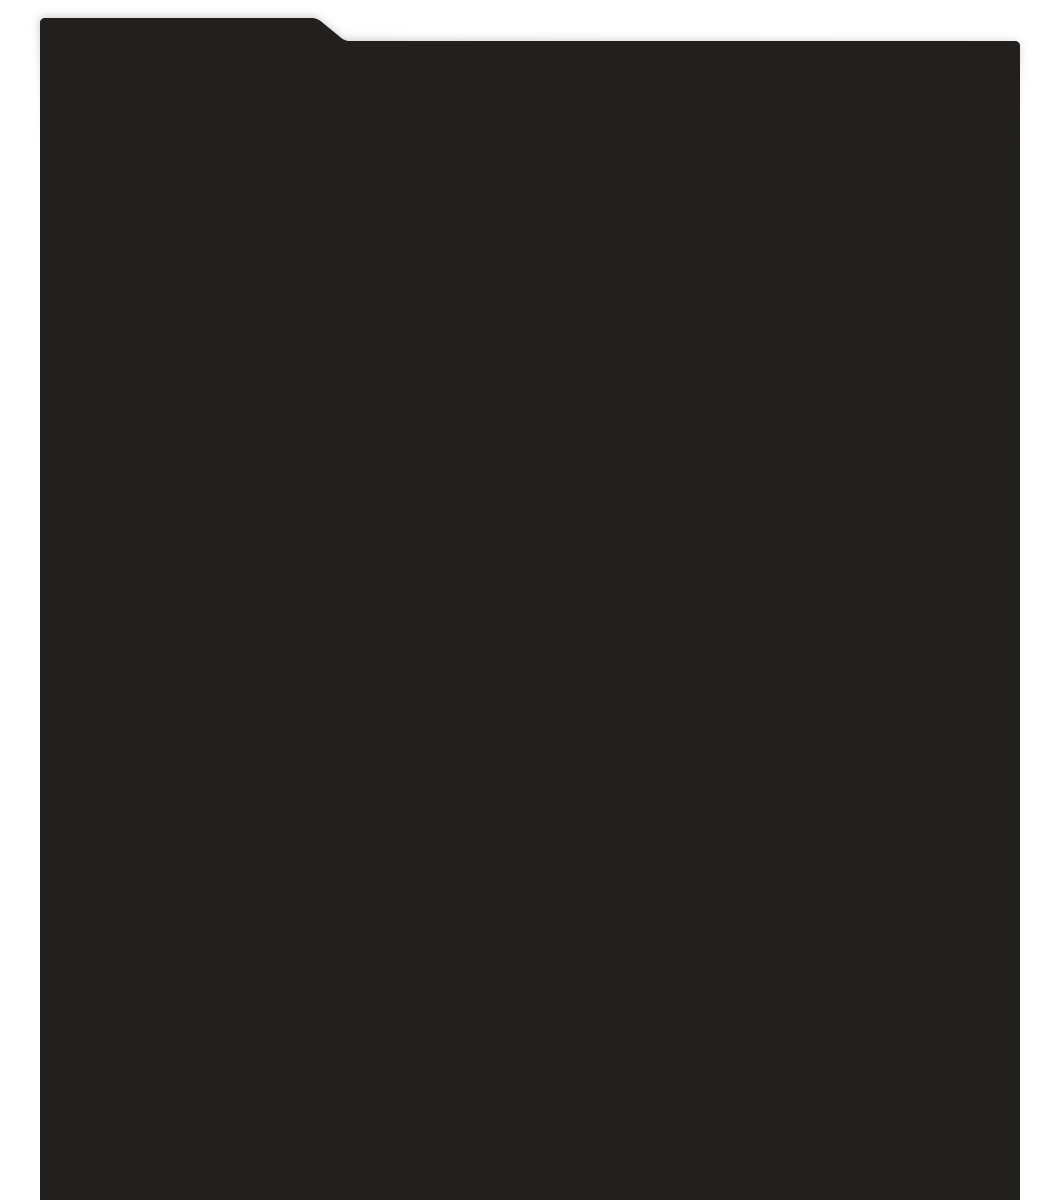
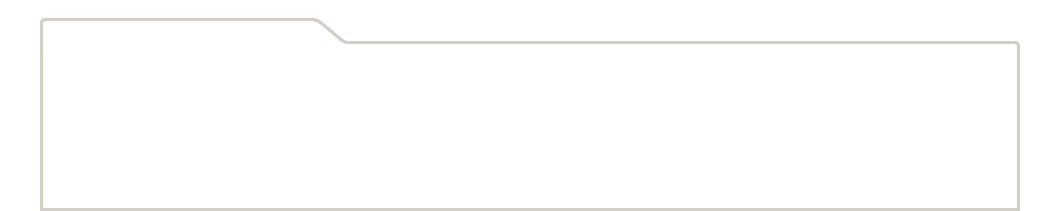
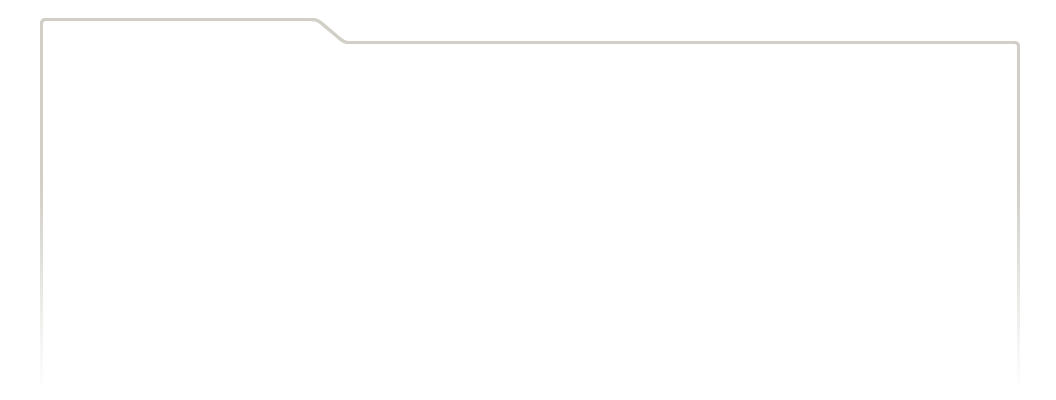
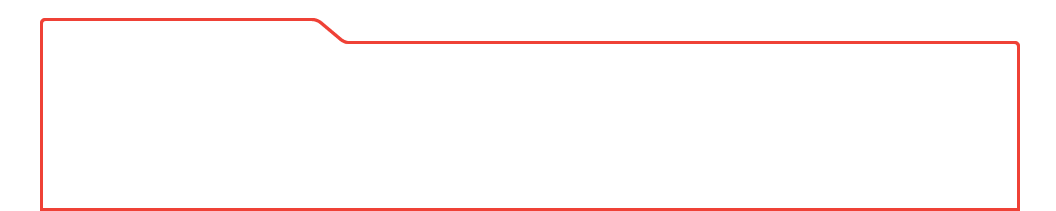
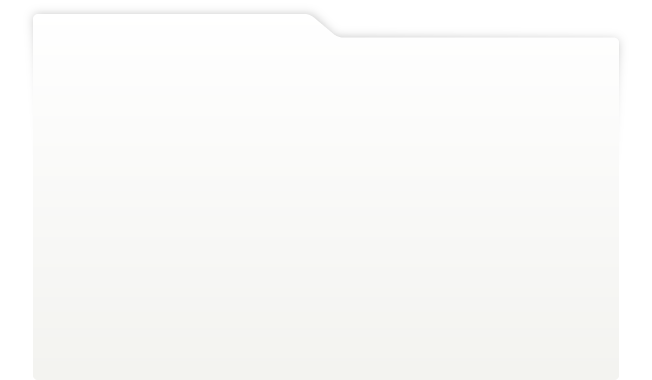
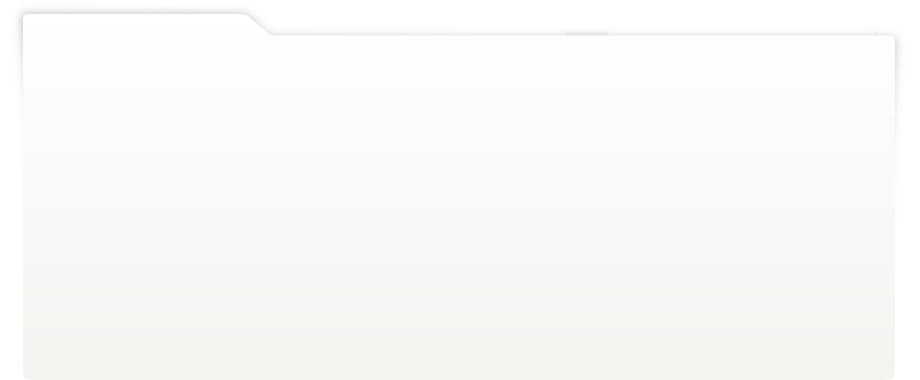
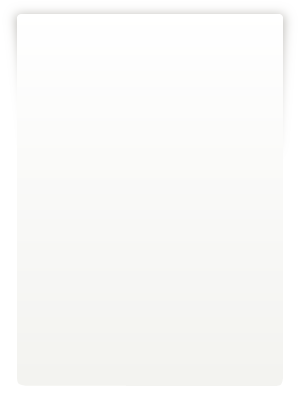
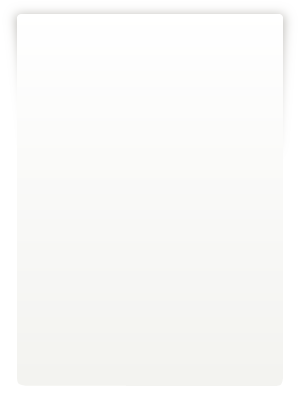
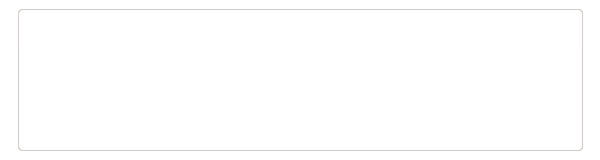
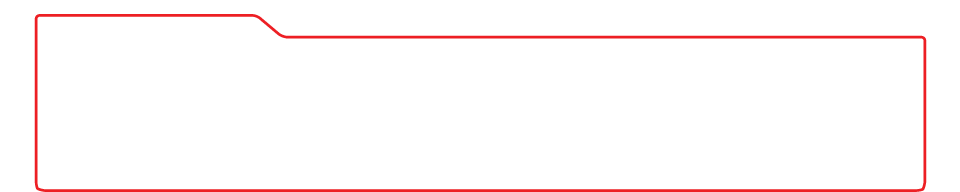
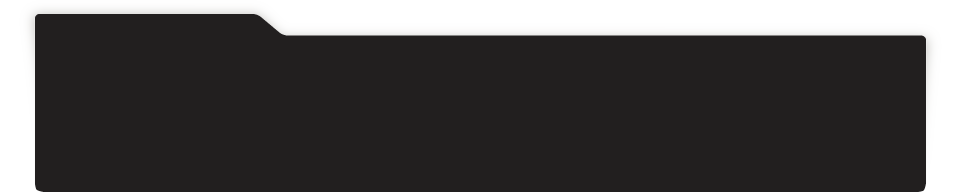
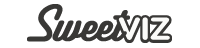
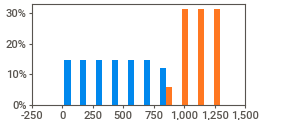
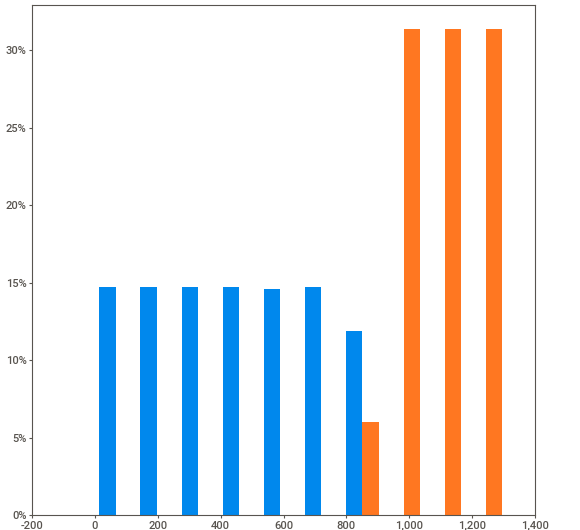
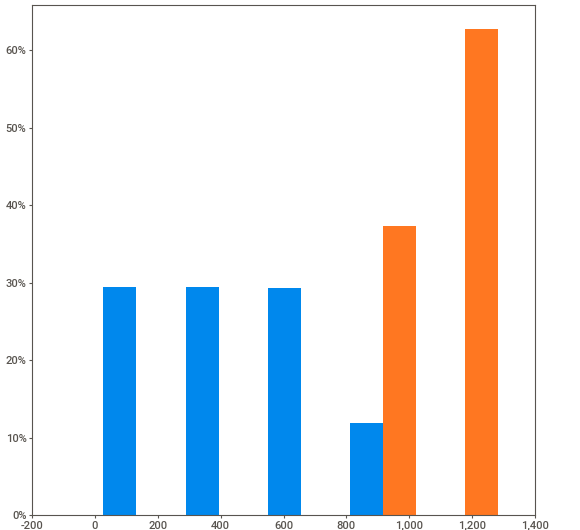
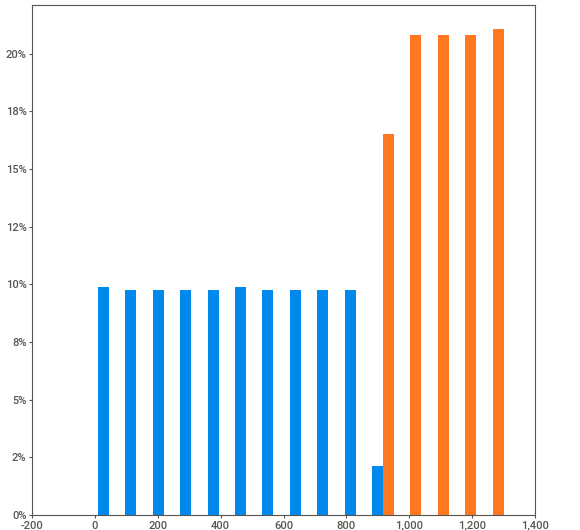
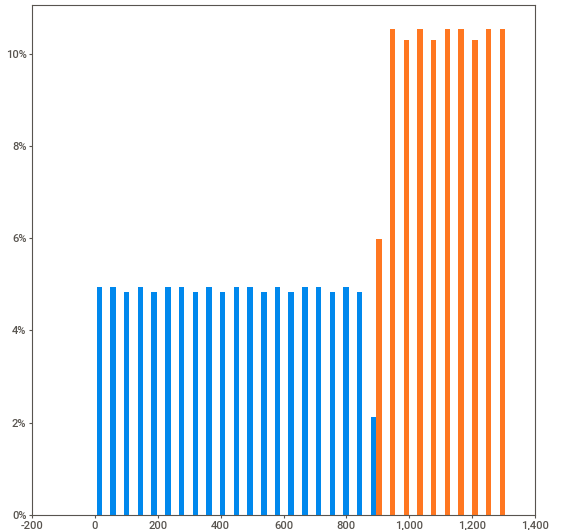
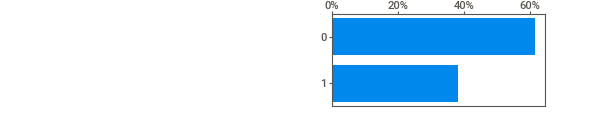
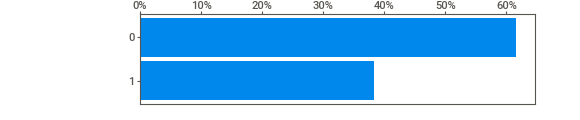
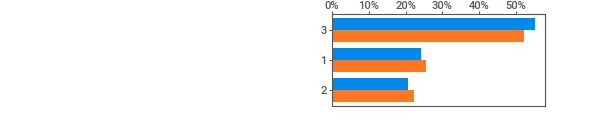
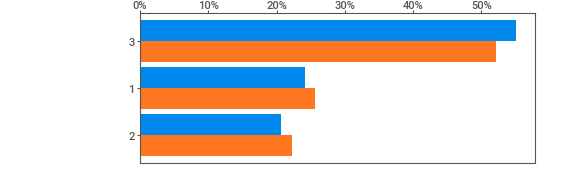
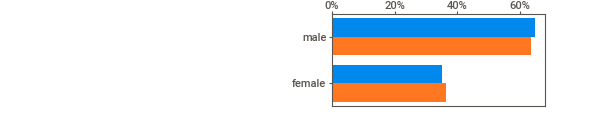
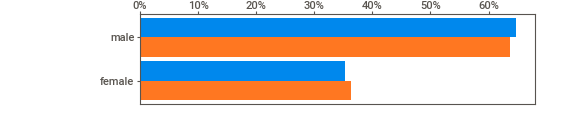
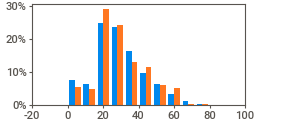
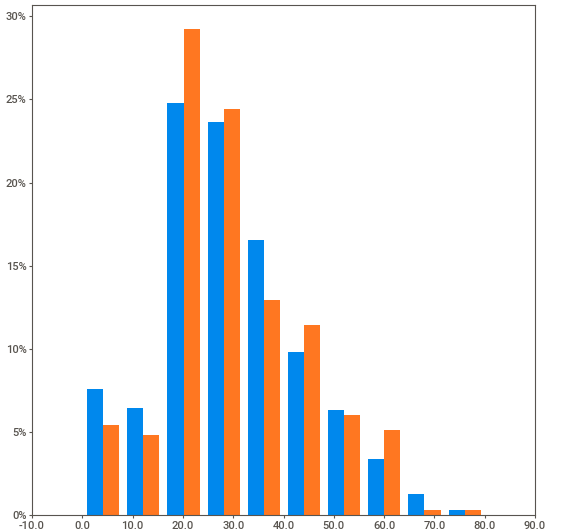
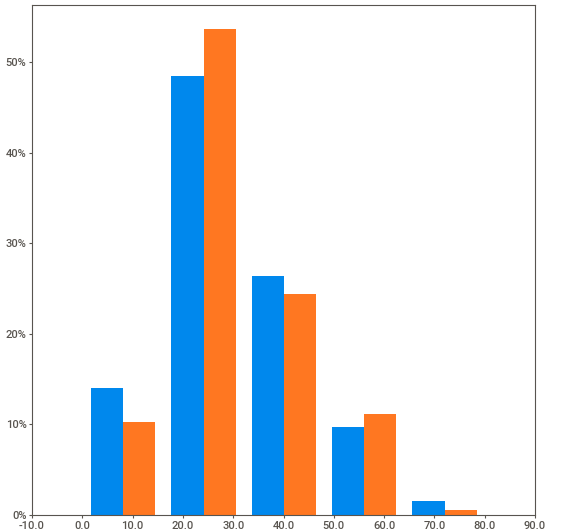
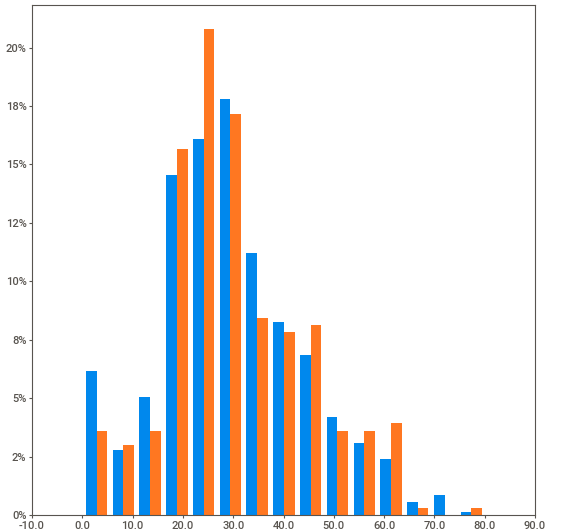
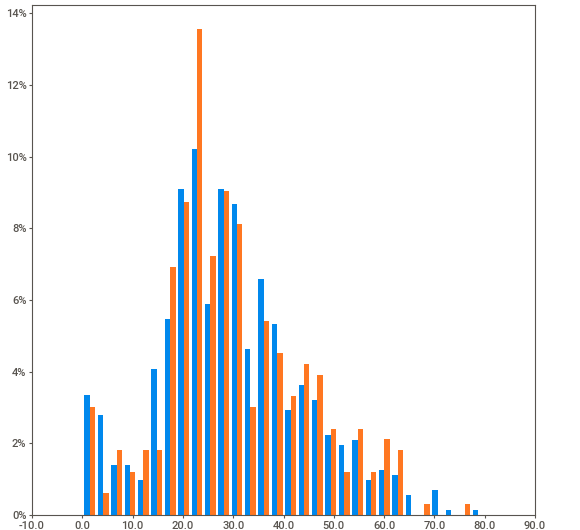
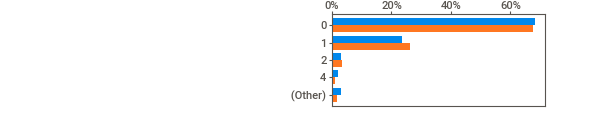
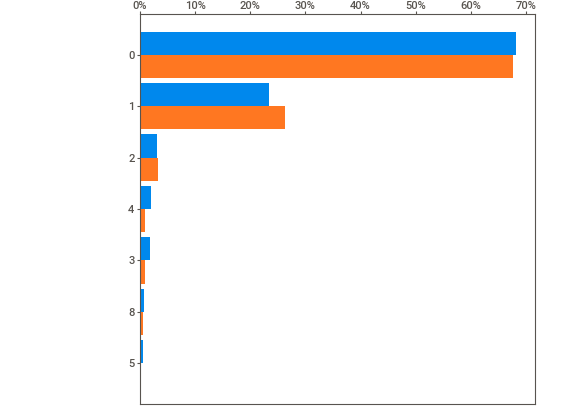
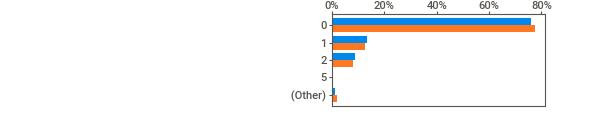
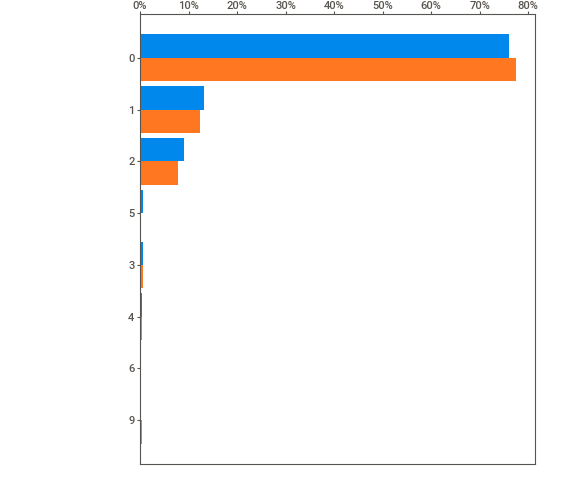
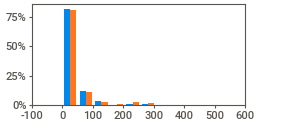
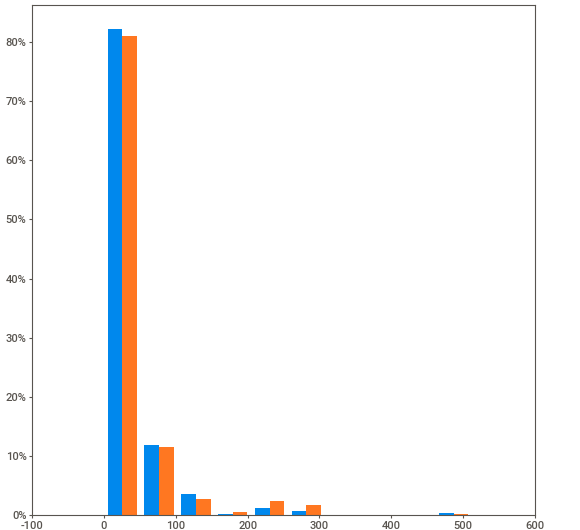
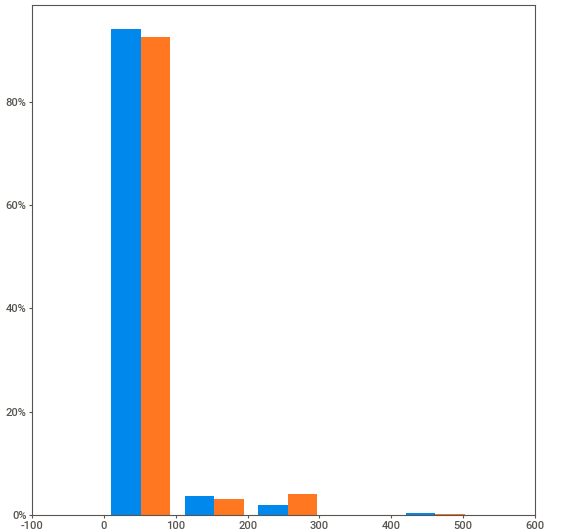
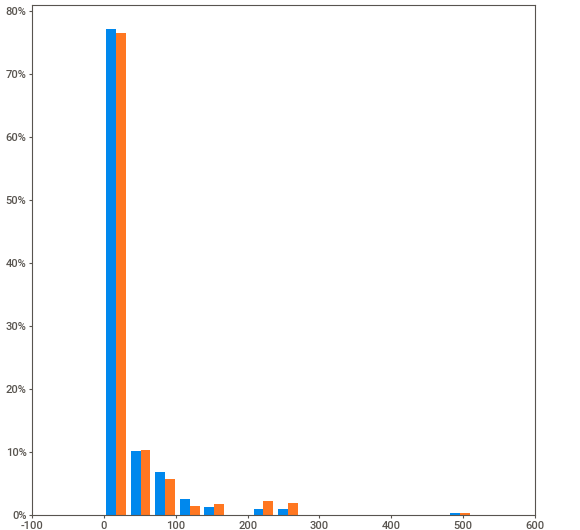
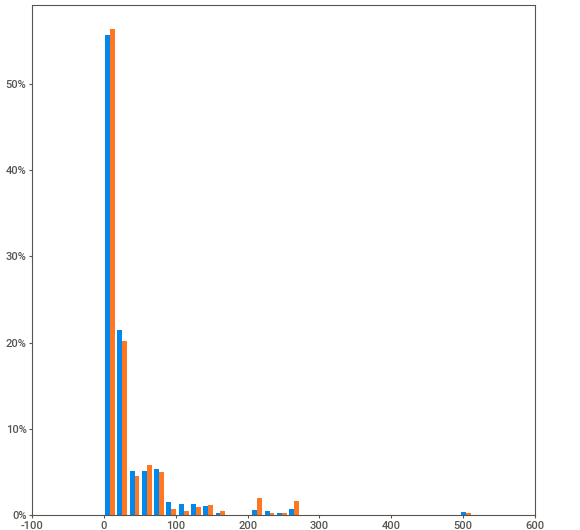
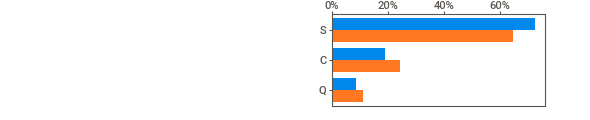
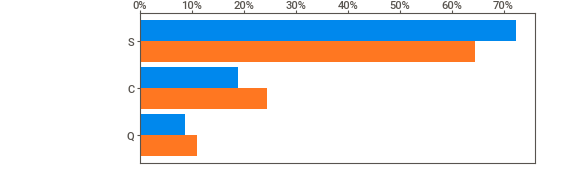
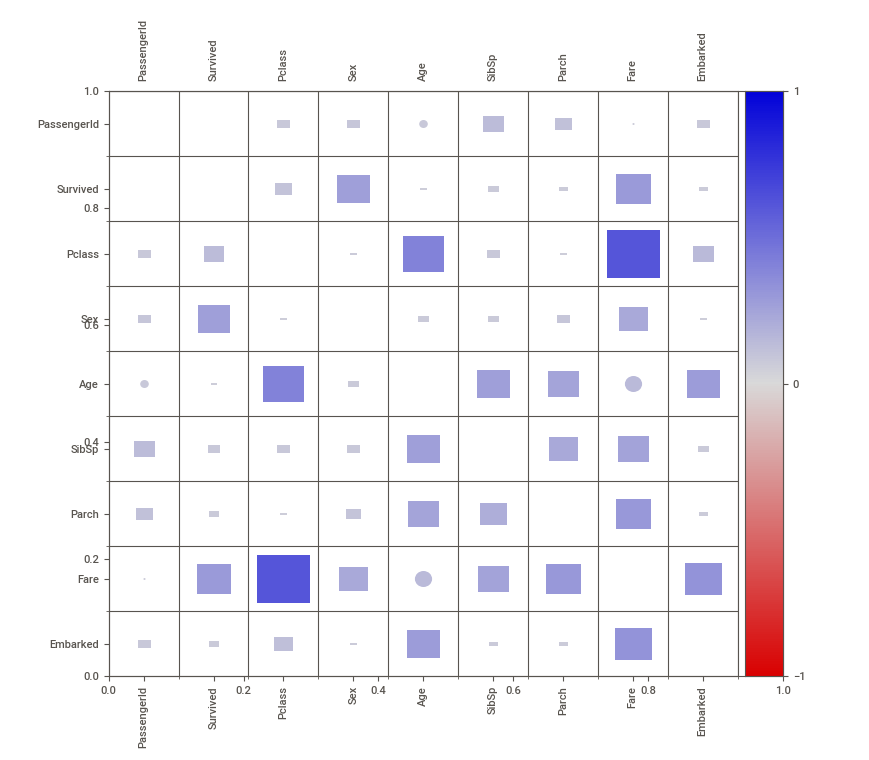
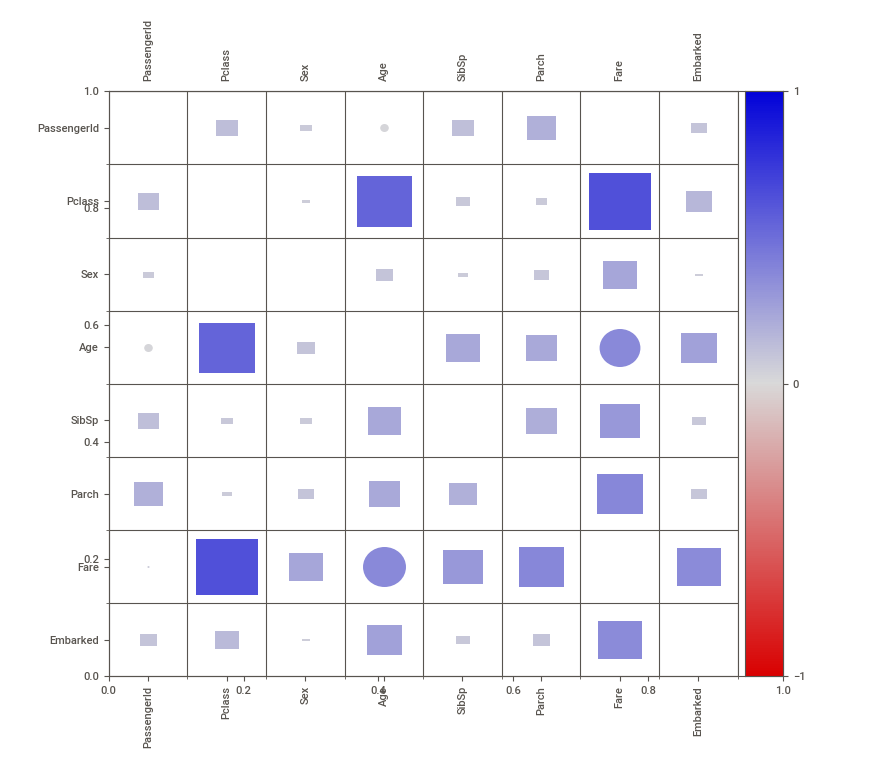

In [47]:
comparison.show_notebook()
